In [1]:
from google.colab import files
uploaded = files.upload()

Saving MSN.csv to MSN.csv


In [2]:
# 1. Import thư viện cần thiết
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN

In [4]:
df = pd.read_csv('MSN.csv')
df["Price"] = df["Price"].str.replace(',', '').astype(float)
df1=df.reset_index()['Price']

In [5]:
# 3. Scaler data
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

<h1># 4. Split the data into training, testing arcording to 7:3

In [6]:
train_size = int(0.7 * len(df1))
test_size = len(df1) - train_size

train_data = df1[:train_size]
test_data = df1[train_size:]

In [7]:
# 5. Hàm Create Dataset
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, X=0,1,2,3-----99   Y=100
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [8]:
#6. Reshape into X=t,t+1,t+2..t+99 and Y=t+100

time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [9]:
# 7. Reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)


In [10]:
# 8. Define LSTM Model

model = Sequential()
model.add(SimpleRNN(50, input_shape=(time_step, 1)))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [11]:
# 9. Fit mô hình với dữ liệu train
model.fit(X_train, y_train, epochs=100, batch_size=64, verbose=1)

Epoch 1/100
13/13 [==============================] - 2s 20ms/step - loss: 0.0284
Epoch 2/100
13/13 [==============================] - 0s 18ms/step - loss: 0.0031
Epoch 3/100
13/13 [==============================] - 0s 19ms/step - loss: 0.0020
Epoch 4/100
13/13 [==============================] - 0s 19ms/step - loss: 0.0015
Epoch 5/100
13/13 [==============================] - 0s 35ms/step - loss: 0.0014
Epoch 6/100
13/13 [==============================] - 0s 33ms/step - loss: 0.0014
Epoch 7/100
13/13 [==============================] - 0s 35ms/step - loss: 0.0013
Epoch 8/100
13/13 [==============================] - 0s 32ms/step - loss: 0.0012
Epoch 9/100
13/13 [==============================] - 0s 34ms/step - loss: 0.0011
Epoch 10/100
13/13 [==============================] - 0s 34ms/step - loss: 0.0011
Epoch 11/100
13/13 [==============================] - 0s 31ms/step - loss: 0.0010
Epoch 12/100
13/13 [==============================] - 0s 34ms/step - loss: 0.0010
Epoch 13/100
13/13 [=====

In [12]:
# 10. Dự báo dữ liệu test
train_predict=model.predict(X_train)
y_pred=model.predict(X_test)

10/10 [==============================] - 0s 15ms/step


In [13]:
# 11. Chuẩn hóa dữ liệu y_pred, ytest
train_predict=scaler.inverse_transform(train_predict)
y_pred=scaler.inverse_transform(y_pred)
ytest = scaler.inverse_transform(ytest.reshape(-1,1))

In [14]:
from sklearn.metrics import mean_absolute_error
# 12. Đánh giá độ chính xác thuật toán bằng RMSE , MAE, MAPE
test_rmse = np.sqrt(np.mean((y_pred - ytest)**2))
mae_test = mean_absolute_error(ytest, y_pred)
mape_test = np.mean(np.abs((ytest - y_pred) / ytest)) * 100

print('Testing RMSE:', test_rmse)
print("Test MAE: ", mae_test)
print("Test MAPE: ", mape_test)


Testing RMSE: 1830.6627751012772
Test MAE:  1433.7457350127554
Test MAPE:  2.0043940749830207


In [15]:
# 13. Dự báo 90 ngày tiếp theo
x_input=test_data[-time_step:].reshape(1,-1)
x_input.shape
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<90):

    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1


[0.38694078]
101
1 day input [0.27278593 0.26007684 0.25518873 0.25616635 0.25518873 0.24247964
 0.25030062 0.26496495 0.25714397 0.2581216  0.27180831 0.27083069
 0.26887544 0.25616635 0.26203209 0.25225586 0.25030062 0.25518873
 0.23856915 0.24541251 0.24834537 0.24345726 0.24247964 0.24345726
 0.24345726 0.25616635 0.28256215 0.28158453 0.27376355 0.27474117
 0.26105446 0.26105446 0.26985306 0.27669642 0.29722649 0.29820411
 0.30113697 0.34904046 0.36077193 0.3988992  0.37641389 0.36663766
 0.37836913 0.39987682 0.38032438 0.37641389 0.37054815 0.36566004
 0.36468242 0.37152578 0.37641389 0.34708522 0.33242089 0.3461076
 0.35197333 0.33437613 0.32655515 0.337309   0.32655515 0.32655515
 0.31189082 0.31189082 0.32753277 0.31775655 0.3109132  0.31189082
 0.26300971 0.25518873 0.26203209 0.25909922 0.26300971 0.24150202
 0.26300971 0.27474117 0.26594257 0.27376355 0.29136075 0.30406984
 0.30504746 0.31580131 0.30700271 0.30113697 0.30113697 0.29918173
 0.31482369 0.31677893 0.34708522 

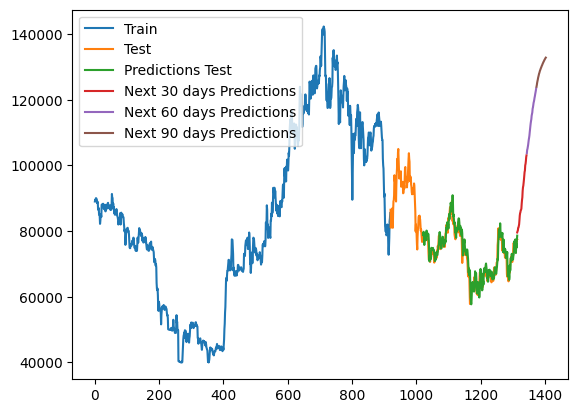

In [16]:
# 14. Vẽ hình
train_data_index = pd.RangeIndex(start=0, stop=train_size, step=1)
plt.plot(scaler.inverse_transform(train_data))

test_data_index = pd.RangeIndex(start=train_size, stop=len(df1), step=1)
plt.plot(test_data_index, scaler.inverse_transform(test_data))

test_data_index = pd.RangeIndex(start=train_size + time_step + 1 , stop=len(df1), step=1)
plt.plot(test_data_index, y_pred)

next_30_days_index = pd.RangeIndex(start=len(df1) - 1, stop=len(df1) + 29, step=1)
plt.plot(next_30_days_index, scaler.inverse_transform(lst_output[:30]))

next_60_days_index = pd.RangeIndex(start=len(df1) + 29, stop=len(df1) + 59, step=1)
plt.plot(next_60_days_index, scaler.inverse_transform(lst_output[30:60]))

next_90_days_index = pd.RangeIndex(start=len(df1) + 59, stop=len(df1) + 89, step=1)
plt.plot(next_90_days_index, scaler.inverse_transform(lst_output[60:]))

plt.legend(['Train', 'Test', 'Predictions Test', 'Next 30 days Predictions', 'Next 60 days Predictions', 'Next 90 days Predictions'])
plt.show()

<h1># 4. Split the data into training, testing arcording to 8:2

In [17]:
train_size = int(0.8 * len(df1))
test_size = len(df1) - train_size

train_data = df1[:train_size]
test_data = df1[train_size:]

In [18]:
# 5. Hàm Create Dataset
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, X=0,1,2,3-----99   Y=100
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [19]:
#6. Reshape into X=t,t+1,t+2..t+99 and Y=t+100

time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [20]:
# 7. Reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [21]:
# 8. Define LSTM Model

model = Sequential()
model.add(SimpleRNN(50, input_shape=(time_step, 1)))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [22]:
# 9. Fit mô hình với dữ liệu train
model.fit(X_train,y_train,epochs=100,batch_size=64,verbose=1)

Epoch 1/100
15/15 [==============================] - 1s 19ms/step - loss: 0.0435
Epoch 2/100
15/15 [==============================] - 0s 17ms/step - loss: 0.0042
Epoch 3/100
15/15 [==============================] - 0s 20ms/step - loss: 0.0023
Epoch 4/100
15/15 [==============================] - 0s 20ms/step - loss: 0.0019
Epoch 5/100
15/15 [==============================] - 0s 18ms/step - loss: 0.0018
Epoch 6/100
15/15 [==============================] - 0s 18ms/step - loss: 0.0017
Epoch 7/100
15/15 [==============================] - 0s 20ms/step - loss: 0.0016
Epoch 8/100
15/15 [==============================] - 0s 19ms/step - loss: 0.0015
Epoch 9/100
15/15 [==============================] - 0s 18ms/step - loss: 0.0015
Epoch 10/100
15/15 [==============================] - 0s 20ms/step - loss: 0.0014
Epoch 11/100
15/15 [==============================] - 0s 18ms/step - loss: 0.0014
Epoch 12/100
15/15 [==============================] - 0s 18ms/step - loss: 0.0014
Epoch 13/100
15/15 [=====

In [23]:
# 10. Dự báo dữ liệu test
train_predict=model.predict(X_train)
y_pred=model.predict(X_test)

6/6 [==============================] - 0s 6ms/step


In [24]:
# 11. Chuẩn hóa dữ liệu y_pred, ytest
train_predict=scaler.inverse_transform(train_predict)
y_pred=scaler.inverse_transform(y_pred)
ytest = scaler.inverse_transform(ytest.reshape(-1,1))

In [25]:
from sklearn.metrics import mean_absolute_error
# 12. Đánh giá độ chính xác thuật toán bằng RMSE , MAE, MAPE
test_rmse = np.sqrt(np.mean((y_pred - ytest)**2))
mae_test = mean_absolute_error(ytest, y_pred)
mape_test = np.mean(np.abs((ytest - y_pred) / ytest)) * 100

print('Testing RMSE:', test_rmse)
print("Test MAE: ", mae_test)
print("Test MAPE: ", mape_test)

Testing RMSE: 1814.292316723482
Test MAE:  1383.4100597993831
Test MAPE:  2.025502363090934


In [26]:
# 13. Dự báo 90 ngày tiếp theo

x_input=test_data[-time_step:].reshape(1,-1)
x_input.shape

temp_input=list(x_input)
temp_input=temp_input[0].tolist()

from numpy import array

lst_output=[]

n_steps=100
i=0
while(i<90):

    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1

[0.3699663]
101
1 day input [0.27278593 0.26007684 0.25518873 0.25616635 0.25518873 0.24247964
 0.25030062 0.26496495 0.25714397 0.2581216  0.27180831 0.27083069
 0.26887544 0.25616635 0.26203209 0.25225586 0.25030062 0.25518873
 0.23856915 0.24541251 0.24834537 0.24345726 0.24247964 0.24345726
 0.24345726 0.25616635 0.28256215 0.28158453 0.27376355 0.27474117
 0.26105446 0.26105446 0.26985306 0.27669642 0.29722649 0.29820411
 0.30113697 0.34904046 0.36077193 0.3988992  0.37641389 0.36663766
 0.37836913 0.39987682 0.38032438 0.37641389 0.37054815 0.36566004
 0.36468242 0.37152578 0.37641389 0.34708522 0.33242089 0.3461076
 0.35197333 0.33437613 0.32655515 0.337309   0.32655515 0.32655515
 0.31189082 0.31189082 0.32753277 0.31775655 0.3109132  0.31189082
 0.26300971 0.25518873 0.26203209 0.25909922 0.26300971 0.24150202
 0.26300971 0.27474117 0.26594257 0.27376355 0.29136075 0.30406984
 0.30504746 0.31580131 0.30700271 0.30113697 0.30113697 0.29918173
 0.31482369 0.31677893 0.34708522 0

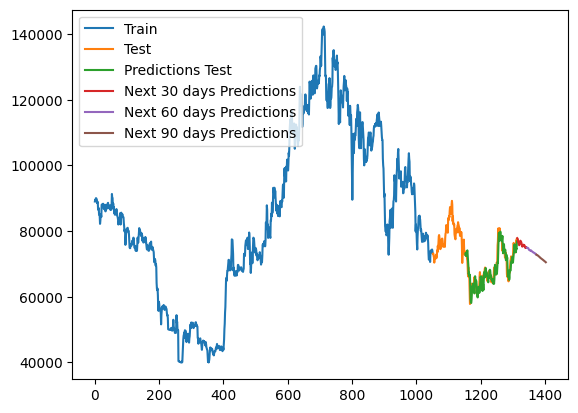

In [27]:
# 14. Vẽ hình
train_data_index = pd.RangeIndex(start=0, stop=train_size, step=1)
plt.plot(scaler.inverse_transform(train_data))

test_data_index = pd.RangeIndex(start=train_size, stop=len(df1), step=1)
plt.plot(test_data_index, scaler.inverse_transform(test_data))

test_data_index = pd.RangeIndex(start=train_size + time_step + 1 , stop=len(df1), step=1)
plt.plot(test_data_index, y_pred)

next_30_days_index = pd.RangeIndex(start=len(df1) - 1, stop=len(df1) + 29, step=1)
plt.plot(next_30_days_index, scaler.inverse_transform(lst_output[:30]))

next_60_days_index = pd.RangeIndex(start=len(df1) + 29, stop=len(df1) + 59, step=1)
plt.plot(next_60_days_index, scaler.inverse_transform(lst_output[30:60]))

next_90_days_index = pd.RangeIndex(start=len(df1) + 59, stop=len(df1) + 89, step=1)
plt.plot(next_90_days_index, scaler.inverse_transform(lst_output[60:]))

plt.legend(['Train', 'Test', 'Predictions Test', 'Next 30 days Predictions', 'Next 60 days Predictions', 'Next 90 days Predictions'])
plt.show()

<h1># 4. Split the data into training, testing arcording to 9:1

In [29]:
train_size = int(0.9 * len(df1))
test_size = len(df1) - train_size

train_data = df1[:train_size]
test_data = df1[train_size:]

In [30]:
# 5. Hàm Create Dataset
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, X=0,1,2,3-----99   Y=100
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [31]:
#6. Reshape into X=t,t+1,t+2..t+99 and Y=t+100

time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [32]:
# 7. Reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)


In [33]:
# 8. Define LSTM Model

model = Sequential()
model.add(SimpleRNN(50, input_shape=(time_step, 1)))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [34]:
# 9. Fit mô hình với dữ liệu train
model.fit(X_train,y_train,epochs=100,batch_size=64,verbose=1)

Epoch 1/100
17/17 [==============================] - 1s 18ms/step - loss: 0.0836
Epoch 2/100
17/17 [==============================] - 0s 18ms/step - loss: 0.0087
Epoch 3/100
17/17 [==============================] - 0s 17ms/step - loss: 0.0044
Epoch 4/100
17/17 [==============================] - 0s 21ms/step - loss: 0.0034
Epoch 5/100
17/17 [==============================] - 0s 19ms/step - loss: 0.0029
Epoch 6/100
17/17 [==============================] - 0s 19ms/step - loss: 0.0026
Epoch 7/100
17/17 [==============================] - 0s 20ms/step - loss: 0.0026
Epoch 8/100
17/17 [==============================] - 0s 19ms/step - loss: 0.0022
Epoch 9/100
17/17 [==============================] - 0s 18ms/step - loss: 0.0021
Epoch 10/100
17/17 [==============================] - 0s 20ms/step - loss: 0.0020
Epoch 11/100
17/17 [==============================] - 0s 20ms/step - loss: 0.0019
Epoch 12/100
17/17 [==============================] - 0s 18ms/step - loss: 0.0018
Epoch 13/100
17/17 [=====

In [35]:
# 10. Dự báo dữ liệu test
train_predict=model.predict(X_train)
y_pred=model.predict(X_test)

1/1 [==============================] - 0s 23ms/step


In [36]:
# 11. Chuẩn hóa dữ liệu y_pred, ytest
train_predict=scaler.inverse_transform(train_predict)
y_pred=scaler.inverse_transform(y_pred)
ytest = scaler.inverse_transform(ytest.reshape(-1,1))

In [37]:
from sklearn.metrics import mean_absolute_error
# 12. Đánh giá độ chính xác thuật toán bằng RMSE , MAE, MAPE
test_rmse = np.sqrt(np.mean((y_pred - ytest)**2))
mae_test = mean_absolute_error(ytest, y_pred)
mape_test = np.mean(np.abs((ytest - y_pred) / ytest)) * 100

print('Testing RMSE:', test_rmse)
print("Test MAE: ", mae_test)
print("Test MAPE: ", mape_test)

Testing RMSE: 1619.0075280299277
Test MAE:  1301.0590977822583
Test MAPE:  1.831020776299492


In [38]:
# 13. Dự báo 90 ngày tiếp theo
x_input=test_data[-time_step:].reshape(1,-1)
x_input.shape

temp_input=list(x_input)
temp_input=temp_input[0].tolist()

from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<90):

    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1



[0.3747117]
101
1 day input [0.27278593 0.26007684 0.25518873 0.25616635 0.25518873 0.24247964
 0.25030062 0.26496495 0.25714397 0.2581216  0.27180831 0.27083069
 0.26887544 0.25616635 0.26203209 0.25225586 0.25030062 0.25518873
 0.23856915 0.24541251 0.24834537 0.24345726 0.24247964 0.24345726
 0.24345726 0.25616635 0.28256215 0.28158453 0.27376355 0.27474117
 0.26105446 0.26105446 0.26985306 0.27669642 0.29722649 0.29820411
 0.30113697 0.34904046 0.36077193 0.3988992  0.37641389 0.36663766
 0.37836913 0.39987682 0.38032438 0.37641389 0.37054815 0.36566004
 0.36468242 0.37152578 0.37641389 0.34708522 0.33242089 0.3461076
 0.35197333 0.33437613 0.32655515 0.337309   0.32655515 0.32655515
 0.31189082 0.31189082 0.32753277 0.31775655 0.3109132  0.31189082
 0.26300971 0.25518873 0.26203209 0.25909922 0.26300971 0.24150202
 0.26300971 0.27474117 0.26594257 0.27376355 0.29136075 0.30406984
 0.30504746 0.31580131 0.30700271 0.30113697 0.30113697 0.29918173
 0.31482369 0.31677893 0.34708522 0

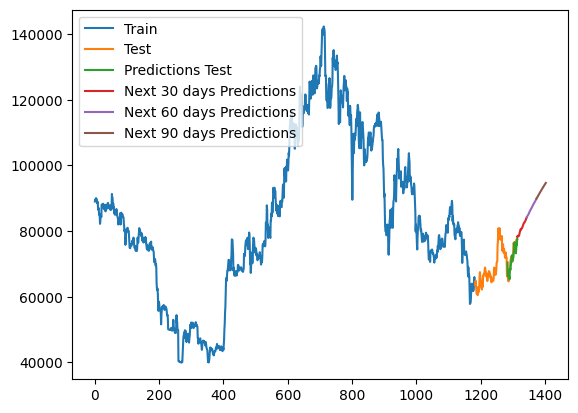

In [39]:
# 14. Vẽ hình
train_data_index = pd.RangeIndex(start=0, stop=train_size, step=1)
plt.plot(scaler.inverse_transform(train_data))

test_data_index = pd.RangeIndex(start=train_size, stop=len(df1), step=1)
plt.plot(test_data_index, scaler.inverse_transform(test_data))

test_data_index = pd.RangeIndex(start=train_size + time_step + 1 , stop=len(df1), step=1)
plt.plot(test_data_index, y_pred)

next_30_days_index = pd.RangeIndex(start=len(df1) - 1, stop=len(df1) + 29, step=1)
plt.plot(next_30_days_index, scaler.inverse_transform(lst_output[:30]))

next_60_days_index = pd.RangeIndex(start=len(df1) + 29, stop=len(df1) + 59, step=1)
plt.plot(next_60_days_index, scaler.inverse_transform(lst_output[30:60]))

next_90_days_index = pd.RangeIndex(start=len(df1) + 59, stop=len(df1) + 89, step=1)
plt.plot(next_90_days_index, scaler.inverse_transform(lst_output[60:]))

plt.legend(['Train', 'Test', 'Predictions Test', 'Next 30 days Predictions', 'Next 60 days Predictions', 'Next 90 days Predictions'])
plt.show()